In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

### Running diffusion coefficient for $\kappa = 1.5\cdot10^{21}$cm$^2$/s

In [49]:
kappa = 1.5*10**21
sim = rw.IsotropicSimulation(nr_particles = 10**3, energy = energy, nr_steps = nr_steps/100, diffusion_coefficient_para = kappa, nr_obs_steps = 600)
%time sim.simulate()

simulate with a diffusion coefficient of  1.5e+21 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 5.94 s, sys: 116 ms, total: 6.05 s
Wall time: 6.07 s


init statistics plotting class


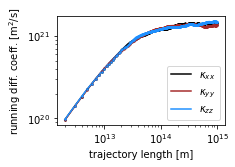

diffusion coefficients computed between 3.20e+14m and 1.00e+15m with 100 data points
kappa_{xx}: 1.42e+21 m²/s +- 1.98e+19 m²/s
kappa_{yy}: 1.34e+21 m²/s +- 3.41e+19 m²/s
kappa_{zz}: 1.43e+21 m²/s +- 4.89e+19 m²/s


In [50]:
df = pd.read_pickle("isotropic.pkl")
sta = rw.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

### Running diffusion coefficient for $\kappa = 1.5\cdot10^{20}$cm$^2$/s

In [7]:
kappa = 1.5*10**20
sim = rw.IsotropicSimulation(nr_particles = 10**3, energy = energy, nr_steps = nr_steps/100, step_size = 1*10**11, diffusion_coefficient_para = kappa, nr_obs_steps = 600)
%time sim.simulate()

simulate with a diffusion coefficient of  1.5e+20 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 5.52 s, sys: 108 ms, total: 5.63 s
Wall time: 5.67 s


init statistics plotting class


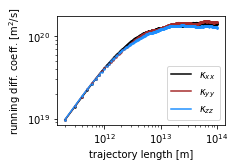

diffusion coefficients computed between 3.20e+13m and 1.00e+14m with 100 data points
kappa_{xx}: 1.42e+20 m²/s +- 2.47e+18 m²/s
kappa_{yy}: 1.47e+20 m²/s +- 4.12e+18 m²/s
kappa_{zz}: 1.32e+20 m²/s +- 1.81e+18 m²/s


In [8]:
df = pd.read_pickle("isotropic.pkl")
sta = rw.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

### Running diffusion coefficient for $\kappa = 1.5\cdot10^{19}$cm$^2$/s

In [13]:
kappa = 1.5*10**19
sim = rw.IsotropicSimulation(nr_particles = 10**3, energy = energy, nr_steps = nr_steps/100, diffusion_coefficient_para = kappa, nr_obs_steps = 600,  step_size = 1*10**10)
%time sim.simulate()

simulate with a diffusion coefficient of  1.5e+19 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 5.65 s, sys: 88.3 ms, total: 5.73 s
Wall time: 5.77 s


init statistics plotting class


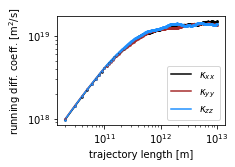

diffusion coefficients computed between 3.20e+12m and 1.00e+13m with 100 data points
kappa_{xx}: 1.45e+19 m²/s +- 4.88e+17 m²/s
kappa_{yy}: 1.41e+19 m²/s +- 1.91e+17 m²/s
kappa_{zz}: 1.4e+19 m²/s +- 2.98e+17 m²/s


In [14]:
df = pd.read_pickle("isotropic.pkl")
sta = rw.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)

## Plasmoid simulations with escaping particles

In [ ]:
def simulation(diffusion_coefficient):
    sim = rw.Simulation()

    nr_particles = 2*10**5
    source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
    energy = 10**12 # eV
    sphere = 10**14 # [m]
    radius = sphere
    source = rw.SphereSourceIsotropic(energy, source_pos, nr_particles, radius)
    sim.add_source(source)

    nr_steps = 1*10**5
    step_size = 1.0*10**11 # [m]
    speed_of_light = 3*10**8 # [m/s]
    mfp_iso = 3*diffusion_coefficient/speed_of_light
    mfp = np.array([mfp_iso, mfp_iso, mfp_iso], dtype=np.float32)  # [m]
    propagator = rw.IsotropicPropagator(mfp, nr_steps, step_size)
    sim.add_propagator(propagator)

    substeps = [False, False, True] # observe only steps (no substeps)
    spheres = [sphere]
    observer = rw.SphericalObserver(substeps, spheres, on_detection_deactivate=True)
    sim.add_observer(observer)
    return sim

### For $\kappa = 1.5\cdot10^{21}$cm$^2$/s

In [3]:
diffusion_coefficient = 1.5*10**21 # [m^2/s]
sim = simultion(diffusion_coefficient)

start simulation
Propagator initialized
Observer initialized


In [4]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5_sphere')

CPU times: user 14min 14s, sys: 14.1 s, total: 14min 28s
Wall time: 14min 29s
saved data file data/data_tut_5_sphere.pkl


### For $\kappa = 1.5\cdot10^{20}$cm$^2$/s

In [22]:
diffusion_coefficient = 1.5*10**20 # [m^2/s]
sim = simultion(diffusion_coefficient)

start simulation
Propagator initialized
Observer initialized


In [7]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5_sphere_20')

CPU times: user 54min 28s, sys: 337 ms, total: 54min 28s
Wall time: 54min 28s
saved data file data/data_tut_5_sphere_20.pkl


### For $\kappa = 1.5\cdot10^{19}$cm$^2$/s

In [8]:
diffusion_coefficient = 1.5*10**19 # [m^2/s]
sim = simultion(diffusion_coefficient)

start simulation
Propagator initialized
Observer initialized


In [9]:
%time sim.run_simulation()
sim.save_data('data/data_tut_5_sphere_19')

CPU times: user 3h 46min 34s, sys: 1.05 s, total: 3h 46min 35s
Wall time: 3h 46min 37s
saved data file data/data_tut_5_sphere_19.pkl


## Compare the escape times for different diffusion coefficients
The transisitons from the ballistic to the diffusive regime can be apprximated in the above figures of the running diffusion coefficients and plotted in the following comparison plot.

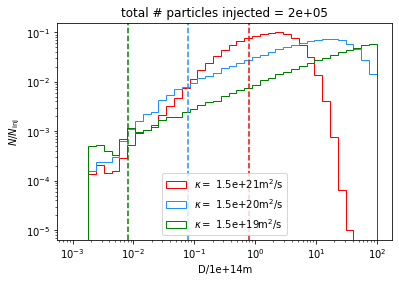

In [25]:
files = ["data/data_tut_5_sphere.pkl", "data/data_tut_5_sphere_20.pkl", "data/data_tut_5_sphere_19.pkl"]
colors = ['r', 'dodgerblue', 'green']
kappas = [1.5*10**21, 1.5*10**20, 1.5*10**19]
transitions = [8*10**13, 8*10**12, 8*10**11]

bins = 40
logbins = np.logspace(np.log10(step_size/sphere),np.log10(step_size*nr_steps/sphere),bins)

for i, file in enumerate(files):
    df = pd.read_pickle(file)
    trajectory_lengths = df['d']
    d = trajectory_lengths/sphere
    weights = np.ones_like(d)/nr_particles
    plt.hist(d, bins=logbins, weights=weights, histtype=u'step', edgecolor=colors[i], linewidth=1., facecolor="None", label='$\kappa=$ {:.1e}m$^2$/s'.format(kappas[i]))
    plt.axvline(x=transitions[i]/sphere, color=colors[i], ls='--')

plt.title('total # particles injected = {:.0e}'.format(nr_particles))
plt.xlabel('D/{:.0e}m'.format(sphere))
plt.ylabel('$N/N_\mathrm{inj}$')
plt.loglog()
plt.legend(loc = "lower center")
plt.savefig('traj_lengths_rwpropa_normalized.pdf')
plt.show()

The transitions from ballistic to diffusive propagation is evident in this comparison plot, as slope of the histogram changes from a $N(D) \propto D^1$ to a $N(D) \propto D^{1/2}$ behaviour -> Particles leave the plasmoid slower when they reach the diffusive propagation regime!